# QUESTION 1

In [32]:
def longest_common_subsequences(x, y):
    """
    Finds all of the Longest Common Subsequences (LCSs) of strings x and y and their corresponding length.

    Parameters
    ----------
    x : str
        The first input string.
    y : str
        The second input string.

    Returns
    -------
    tuple
        A tuple (all_lcs_list, length_lcs), where:
        - all_lcs_list is a list of all LCS strings (no duplicates).
        - length_lcs is the integer length of each LCS.
    """
    m, n = len(x), len(y)

    #Edge case: if one string is empty, there is no common subsequence
    if m == 0 or n == 0:
        return (None, 0)

    #Initialize the DP table to store LCS lengths
    #c[i][j] will hold the length of the LCS of x[:i] and y[:j]
    c = [[0] * (n + 1) for _ in range(m + 1)]
    #Initialize the table to store the actual LCS sets
    #lcs_sets[i][j] will hold a set of all LCS for x[:i] and y[:j]
    lcs_sets = [[set() for _ in range(n + 1)] for _ in range(m + 1)]

    #Fill in the DP tables row by row
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i - 1] == y[j - 1]:
                #Characters match, extend all LCS from the previous diagonal cell
                if c[i - 1][j - 1] == 0:
                    #If the previous diagonal cell has no LCS, start a new set
                    lcs_sets[i][j] = {x[i - 1]}
                else:
                    #Append the matching character to all subsequences in lcs_sets[i-1][j-1]
                    lcs_sets[i][j] = {seq + x[i - 1] for seq in lcs_sets[i - 1][j - 1]}
                c[i][j] = c[i - 1][j - 1] + 1
            else:
                #Characters do not match, choose the direction of the longer LCS
                if c[i - 1][j] > c[i][j - 1]:
                    #Take the LCS from the cell above
                    c[i][j] = c[i - 1][j]
                    lcs_sets[i][j] = lcs_sets[i - 1][j]
                elif c[i - 1][j] < c[i][j - 1]:
                    #Take the LCS from the cell to the left
                    c[i][j] = c[i][j - 1]
                    lcs_sets[i][j] = lcs_sets[i][j - 1]
                else:
                    #If both directions have the same LCS length, merge the sets
                    c[i][j] = c[i - 1][j]
                    lcs_sets[i][j] = lcs_sets[i - 1][j].union(lcs_sets[i][j - 1])

    #Extract the final LCS length from the bottom-right cell of the DP table
    length_lcs = c[m][n]
    if length_lcs == 0:
        #If no common subsequence exists, return None and length 0
        return (None, 0)
    else:
        #Convert the set of LCS to a sorted list for consistent output
        all_lcs_list = sorted(lcs_sets[m][n])
        return (all_lcs_list, length_lcs)


#Test cases
x1, y1 = 'ABCBDAB', 'BDCABA'
x2, y2 = 'abc', ''
x3, y3 = 'abc', 'a'
x4, y4 = 'abc', 'ac'
x6, y6 = "HELLO", "HELLOWORLD"
x7, y7 = "ABC", "ABC"

#Assertions to verify correctness of the implementation
expected_x1_y1 = sorted(['BCAB', 'BDAB', 'BCBA'])
assert longest_common_subsequences(x1, y1) == (expected_x1_y1, 4)  #Test with multiple LCS
assert longest_common_subsequences(x2, y2) == (None, 0)  #Test with an empty string
assert longest_common_subsequences(x3, y3) == (['a'], 1)  #Test with a single matching character
assert longest_common_subsequences(x4, y4) == (['ac'], 2)  #Test with partial matching
assert longest_common_subsequences(x6, y6) == (["HELLO"], 5)  #Test with overlapping subsequences
assert longest_common_subsequences(x7, y7) == (["ABC"], 3)  #Test with identical strings

print("All tests passed.")

All tests passed.


# Question 2

In [7]:
import numpy as np

def lcs_length(x, y):
    """
    Computes the length of the Longest Common Subsequence (LCS) between two strings.

    Parameters
    ----------
    x : str
        The first input string.
    y : str
        The second input string.

    Returns
    -------
    int
        The length of the LCS.
    """
    m, n = len(x), len(y)

    #Initialize a DP table where c[i][j] stores the LCS length for x[:i] and y[:j]
    c = [[0] * (n + 1) for _ in range(m + 1)]

    #Fill the DP table row by row
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if x[i - 1] == y[j - 1]:
                #If characters match, add 1 to the LCS length from the diagonal cell
                c[i][j] = c[i - 1][j - 1] + 1
            else:
                #If no match, take the maximum value from the top or left cell
                c[i][j] = max(c[i - 1][j], c[i][j - 1])
    
    #Return the LCS length for the full strings
    return c[m][n]

#The strings:
a = 'ATGGTGCGAAAGCATCTCTTTTCGTGGCGTGATAAGTTTTATGGTATCCCCGGACGTTGGCTACTACAATTCTCCGAAGTATAAGTGAGTAGGATATGTCAATAACAAGA' \
    'GGGGATGCGTGACGCATTAGCACCAACTGAATCAAACGATAACTAACGTGGTTTCAGTGAGCGTATGTGGCAAAGGATTGGATACATTTTTCGAGCACGTCTACATAATGA' \
    'CCGTGACAATACTGGAGACTCCGTACCGTCATCTTGACACTCCT'

b = 'TGGTGCGAAAGCATCTCTTTTCCGTGGCGTATAGTTTTATGGTATCCCCGGAACGCTGGCTACTACAATCTCCGAAGTATAGAGTGAGTAGATTTAATTAACAGAGGGCG' \
    'TCGTTGACGCATTAGCACCAACTGAATCAACCGATAACTTAACGTGGGTTTCAGTGACTATAGGGCAAAGGATGAACATTTTCGAGCAGCTCTAATAATGAGCGTGACAAT' \
    'ATGAATCCACACCGTCATCTTGAACTCCT'

c = 'TCTGTGCGATATACATCTCTATCGTTGCGGTATGTTTTATGTGCATCACCCCACGCGCTGGCTACAGTACAATCTGCTGGAAGTACTAGGTGGTAGTTAATAACTAGGGT' \
    'GCGTCGTTGCGCATTACACAACTGGACAACCACTTAACTGGGGTAATCAGTGTTTAGGGCAGACAAGATGAAAACAAGTTTTCGAGCAGGCTCCTATAATGAGGACGGAAC' \
    'GTTAATAAATCCAACACCGCACTGCTTCGTAACCCT'

d = 'ATGAGGCGCAAAATTCTCTTTCTCGTGGCGCTGATTAAGTTTTATGTATCCCCGGACGTTGGCTACTGACAATTGCTCCGAAGTATAAAGTAGTAGGATATGTCAATAAC' \
    'AAAGACGGGGATAGCGTGACAGCATTAGAACGCAACTGGAATCAAACGTAACCTAAAGGGTTGTCAGGAGCGTATGTGGTCAAAAAGGATTGGATGACATTTTTCGACACG' \
    'TCTACATAATGACCTGTGACAAACTAGGAGACCTCCTACTCGGTCAATCTTGACGACTCCT'

e = 'TGGTGCGATATACATCTCTTTTCGTGCGTATGTTTTATGGTGATCACCCGGAACCGCTGGCTACATACAATCTCTGGAAGTACTAGGTGGTAGTTTAATAACTAGAGGTG' \
    'CGTCGTTGACGCATTACACAACTGGATCAACCGAACTTAACTGGGTATCAGTGATATAGGGCGACAAGATGAACAATTTTCGAGCAGCTCCTGAATAATGAGACGGAACGT' \
    'ATAATCCAACACCGTCACTGCTTCGAACCCT'

f = 'GGGGGAAAGCGATCCCTTATCGTGGCTGTGATAAGTTTTTATCGGGTATCCGCCGGACGTTGGCGTACTACAATTCTCCGAAGTTAAGTGAGTTAGGGATATAGTCAATA' \
    'ACAAGAGGGGATTGTCGTGACGCATAGCACACAACTGAATCAAATCGATAACTAAACGGGTTTCAGTAGAGCGTTGTGGCAAAGATTGGATACATTTTTCGCAGGACGTCT' \
    'TACCTAATGACGTGGACAATAACTGGCAGACGTCCGTACCGTCATCTTGACCACTCCCT'

g = 'TGGTGCGATATACATCCTCTTTTCGTGCGTATGTTTTAGGTACACCGGATACGCCTGGCTTACAAGTACCAATCTCTGAGAAGTCACTGAGGTGGTAGTTTAATAACTAG' \
    'AAGGGTGCGTCGGACGCATTCACACATACTGGATCAACCGAGACTTAACTGGGGTATCAGTGATTGATAGGGCGACAAGATATACAATTTTCGAGCAGCTCCCTGAATAAG' \
    'TGAAGAACGGAGACGTATAATCCAACACGATTCACTGCTTCGAACCCT'

set_strings = [a, b, c, d, e, f, g]

#Create a 7x7 LCS length matrix
len_lcs_matrix = np.zeros((len(set_strings), len(set_strings)), dtype=int)

#Compute the LCS lengths for every pair of strings
for i in range(len(set_strings)):
    for j in range(len(set_strings)):
        len_lcs_matrix[i, j] = lcs_length(set_strings[i], set_strings[j])

print("LCS Length Matrix:\n", len_lcs_matrix)


LCS Length Matrix:
 [[265 235 199 252 214 251 212]
 [235 250 211 223 227 223 220]
 [199 211 257 197 234 195 229]
 [252 223 197 282 207 241 205]
 [214 227 234 207 252 205 243]
 [251 223 195 241 205 280 208]
 [212 220 229 205 243 208 269]]


# QUESTION 4 - GREEDY

In [33]:
def construct_tree_greedy(strings, lcs_matrix):
    """
    Constructs a binary tree using a greedy local strategy.

    Parameters
    ----------
    strings : list of str
        List of strings representing the nodes (e.g., [a, b, c, d, e, f, g]).
    lcs_matrix : numpy.ndarray
        A 2D numpy array where lcs_matrix[i][j] is the LCS length between strings[i] and strings[j].

    Returns
    -------
    dict
        A dictionary representing the tree where keys are parent nodes (indices) 
        and values are lists of child node indices.
    """
    n = len(strings)  #Total number of strings (nodes)
    tree = {}  #Dictionary to represent the tree structure
    unassigned = set(range(n))  #Set of nodes that are not yet part of the tree

    #Select the root node
    #Root is the node with the highest total LCS sum with all other nodes
    root = np.argmax(np.sum(lcs_matrix, axis=1))  #Find the index of the root
    tree[root] = []  #Initialize the root with no children
    unassigned.remove(root)  #Remove the root from the unassigned set

    #Build the tree using a greedy approach
    queue = [root]  #Start with the root in the queue
    while queue:
        parent = queue.pop(0)  #Get the next node to process as the parent

        #Find the two nodes with the strongest connections (highest LCS values) to the parent
        candidates = sorted(
            [(lcs_matrix[parent, i], i) for i in unassigned],  #Get LCS scores with unassigned nodes
            reverse=True  #Sort by LCS value in descending order
        )[:2]  #Take the top two candidates

        #Assign the top two candidates as children of the current parent
        children = [child for _, child in candidates]  #Extract the indices of the children
        tree[parent] = children  #Add the children to the tree
        for child in children:
            unassigned.remove(child)  #Remove the children from the unassigned set
            queue.append(child)  #Add the children to the queue for further processing

    #Handle any remaining unassigned nodes (if any)
    #These nodes are added as leaves with no children
    for node in unassigned:
        tree[node] = []  #Add remaining nodes with no children

    return tree 


labels = ["a", "b", "c", "d", "e", "f", "g"]

#Construct the tree using the greedy approach
tree_greedy = construct_tree_greedy(set_strings, len_lcs_matrix)

#Map the indices in the tree back to their corresponding string labels for readability
tree_greedy_labeled = {labels[parent]: [labels[child] for child in children] for parent, children in tree_greedy.items()}

print(tree_greedy_labeled)


{'a': ['d', 'f'], 'd': ['b', 'e'], 'f': ['g', 'c'], 'b': [], 'e': [], 'g': [], 'c': []}


# QUESTION 4 - DYNAMIC PROGRAMMING

In [34]:
def construct_tree_global(strings, lcs_matrix):
    """
    Constructs a binary tree using a global optimization strategy to maximize the total LCS.
    The approach uses dynamic programming to calculate the optimal way to divide the tree,
    ensuring the maximum LCS sum across all nodes.

    Parameters
    ----------
    strings : list of str
        List of strings representing the nodes (e.g., [a, b, c, d, e, f, g]).
    lcs_matrix : numpy.ndarray
        A 2D numpy array where lcs_matrix[i][j] is the LCS length between strings[i] and strings[j].

    Returns
    -------
    dict
        A dictionary representing the binary tree structure, where keys are parent nodes 
        (indices) and values are lists of child node indices.
    """

    n = len(strings)  #Number of nodes
    dp = {}  #Dictionary to store dynamic programming results
    parent_map = {}  #Map to store parent-child relationships for reconstruction

    def generate_subsets(elements):
        """
        Generate all subsets of a given set of elements.

        Parameters
        ----------
        elements : set
            The set of elements to generate subsets for.

        Returns
        -------
        list of set
            A list containing all subsets of the input set.
        """
        elements_list = list(elements)

        def backtrack(index, current_subset, all_subsets):
            #Base case: If we have considered all elements, add the current subset
            if index == len(elements_list):
                all_subsets.append(set(current_subset))
                return
            #Exclude the current element
            backtrack(index + 1, current_subset, all_subsets)
            #Include the current element
            current_subset.append(elements_list[index])
            backtrack(index + 1, current_subset, all_subsets)
            #Backtrack to remove the last added element
            current_subset.pop()

        all_subsets = []
        backtrack(0, [], all_subsets)
        return all_subsets

    def find_max_lcs(root, unassigned):
        """
        Recursively calculates the maximum total LCS for a subtree rooted at 'root',
        given a set of unassigned nodes.

        Parameters
        ----------
        root : int
            The index of the current root node.
        unassigned : set
            The set of indices for unassigned nodes.

        Returns
        -------
        int
            The maximum total LCS for the subtree rooted at 'root'.
        """
        state = (root, frozenset(unassigned))  #State is a tuple of root and unassigned nodes
        if state in dp:
            return dp[state]

        #Base case: If fewer than 2 nodes remain, this node becomes a leaf
        if len(unassigned) < 2:
            dp[state] = 0
            parent_map[state] = None
            return 0

        max_lcs = 0  #To track the maximum LCS
        best_children = None  #To track the best pair of children

        #Convert unassigned set to a list for iteration
        unassigned_list = list(unassigned)

        #Try every pair of distinct children
        for i_idx in range(len(unassigned_list)):
            for j_idx in range(i_idx + 1, len(unassigned_list)):
                i_node = unassigned_list[i_idx]
                j_node = unassigned_list[j_idx]

                #LCS sum between the root and the two children
                children_lcs = lcs_matrix[root][i_node] + lcs_matrix[root][j_node]

                #Remaining nodes after assigning these two as children
                remaining = unassigned - {i_node, j_node}

                #Partition remaining nodes between the subtrees of the two children
                subsets = generate_subsets(remaining)
                for R_i in subsets:
                    R_j = remaining - R_i
                    val_i = find_max_lcs(i_node, R_i)
                    val_j = find_max_lcs(j_node, R_j)
                    total_lcs = children_lcs + val_i + val_j

                    #Update maximum LCS and best children if a better solution is found
                    if total_lcs > max_lcs:
                        max_lcs = total_lcs
                        best_children = (i_node, j_node, R_i, R_j)

        dp[state] = max_lcs
        parent_map[state] = best_children
        return max_lcs

    #Try each node as the root to find the optimal tree
    global_max_lcs = 0  #To store the maximum LCS across all roots
    best_root = None
    best_state = None
    all_nodes = set(range(n))
    for root in range(n):
        remaining = all_nodes - {root}
        val = find_max_lcs(root, remaining)
        if val > global_max_lcs:
            global_max_lcs = val
            best_root = root
            best_state = (root, frozenset(remaining))

    #Reconstruct the tree using the parent_map
    tree = {}

    def build_tree(root, unassigned):
        """
        Reconstructs the tree by traversing the parent_map.

        Parameters
        ----------
        root : int
            The current root node.
        unassigned : set
            The set of unassigned nodes.
        """
        state = (root, frozenset(unassigned))
        if parent_map[state] is None:
            tree[root] = []  #Leaf node
            return
        i_node, j_node, R_i, R_j = parent_map[state]
        tree[root] = [i_node, j_node]  #Assign children
        build_tree(i_node, R_i)  #Recursively build left subtree
        build_tree(j_node, R_j)  #Recursively build right subtree

    if best_root is not None:
        remaining = all_nodes - {best_root}
        build_tree(best_root, remaining)
    else:
        #Edge case: No valid tree found, construct a trivial tree
        tree[0] = []

    return tree


labels = ["a", "b", "c", "d", "e", "f", "g"]

#Construct the tree using the global optimization approach
tree_global = construct_tree_global(set_strings, len_lcs_matrix)

#Map the indices in the tree back to their corresponding string labels for readability
tree_global_labeled = {labels[parent]: [labels[child] for child in children] for parent, children in tree_global.items()}

print(tree_global_labeled)


{'b': ['a', 'e'], 'a': ['d', 'f'], 'd': [], 'f': [], 'e': ['c', 'g'], 'c': [], 'g': []}


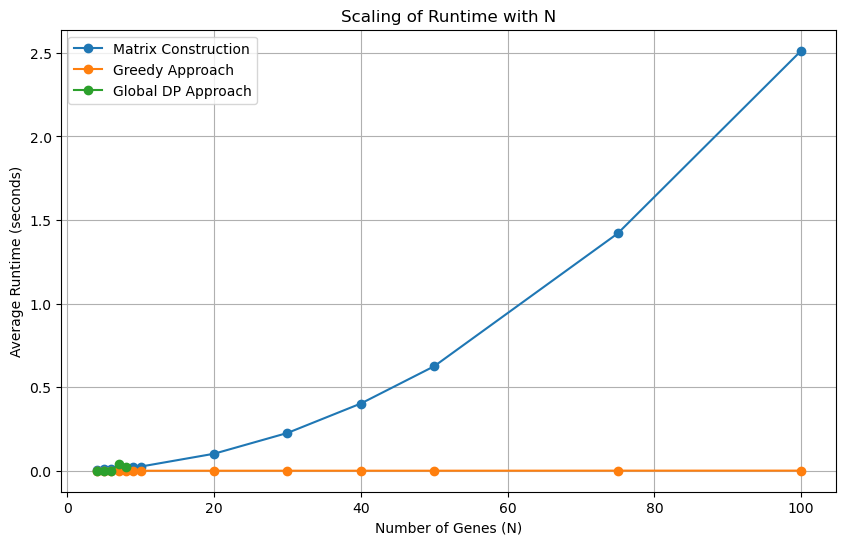

In [40]:
import time
import matplotlib.pyplot as plt
import random

def random_gene(length=100):
    """
    Generates a random DNA sequence of a specified length.

    Parameters
    ----------
    length : int, optional
        The length of the random gene string to generate, by default 100.

    Returns
    -------
    str
        A random string of length 'length' consisting of characters 'A', 'C', 'G', and 'T'.
    """
    #We use random.choices to generate a random sequence of length 'length'
    return ''.join(random.choices('ACGT', k=length))

def build_matrix(strings):
    """
    Builds an LCS length matrix for a given set of strings.

    Parameters
    ----------
    strings : list of str
        List of DNA strings for which to compute the LCS length matrix.

    Returns
    -------
    numpy.ndarray
        A 2D numpy array where element (i, j) is the LCS length between strings[i] and strings[j].
    """
    n = len(strings)  #Number of strings
    matrix = np.zeros((n, n), dtype=int)  #Initialize an n x n matrix with zeros

    #Compute LCS length for each pair of strings
    for i in range(n):
        for j in range(n):
            matrix[i, j] = lcs_length(strings[i], strings[j])  #Compute LCS length
    return matrix

def measure_runtime(N, M, trials=5):
    """
    Measures the average runtime for building the LCS matrix, constructing a greedy tree, 
    and constructing a globally optimized tree.

    Parameters
    ----------
    N : int
        Number of gene strings to generate.
    M : int
        Length of each gene string.
    trials : int, optional
        Number of trials to average the runtime, by default 5.

    Returns
    -------
    tuple
        A tuple (avg_matrix, avg_greedy, avg_global), where:
        - avg_matrix : float
            Average runtime for building the LCS matrix.
        - avg_greedy : float
            Average runtime for the greedy tree construction.
        - avg_global : float
            Average runtime for the global tree construction, or NaN if not computed.
    """
    times_matrix = []  #To store runtimes for matrix construction
    times_greedy = []  #To store runtimes for greedy tree construction
    times_global = []  #To store runtimes for global tree construction

    for _ in range(trials):
        #Generate N random strings of length M
        strings = [random_gene(M) for _ in range(N)]

        #Measure runtime for building the LCS matrix
        start = time.time()
        lcs_mat = build_matrix(strings)
        end = time.time()
        times_matrix.append(end - start)  #Record runtime

        #Measure runtime for greedy tree construction
        start = time.time()
        construct_tree_greedy(strings, lcs_mat)
        end = time.time()
        times_greedy.append(end - start)  #Record runtime

        #Measure runtime for global tree construction (only for small N)
        if N <= 8:  #Global tree construction is infeasible for large N due to exponential complexity
            start = time.time()
            construct_tree_global(strings, lcs_mat)
            end = time.time()
            times_global.append(end - start)  #Record runtime
        else:
            times_global.append(np.nan)  #Append NaN for large N

    #Compute average runtimes
    avg_matrix = np.mean(times_matrix)
    avg_greedy = np.mean(times_greedy)
    avg_global = np.nanmean(times_global) if not np.isnan(times_global).all() else np.nan

    return avg_matrix, avg_greedy, avg_global

#Experiment
M = 50  #Length of each gene
N_values = [4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 75, 100]  #List of different N values to test

matrix_times = []  #To store average runtimes for matrix construction
greedy_times = []  #To store average runtimes for greedy tree construction
global_times = []  #To store average runtimes for global tree construction

#Get runtimes for each value of N
for N in N_values:
    m_t, g_t, gl_t = measure_runtime(N, M, trials=5)  #Average over 5 trials
    matrix_times.append(m_t)
    greedy_times.append(g_t)
    global_times.append(gl_t)

#Plotting
plt.figure(figsize=(10, 6))
plt.plot(N_values, matrix_times, marker='o', label='Matrix Construction')
plt.plot(N_values, greedy_times, marker='o', label='Greedy Approach')
# Plot global approach runtimes (only valid points)
valid_indices = [i for i, val in enumerate(global_times) if not np.isnan(val)]
plt.plot([N_values[i] for i in valid_indices], [global_times[i] for i in valid_indices], marker='o', label='Global DP Approach')

plt.xlabel('Number of Genes (N)')
plt.ylabel('Average Runtime (seconds)')
plt.title('Scaling of Runtime with N')
plt.legend()
plt.grid(True)
plt.show()

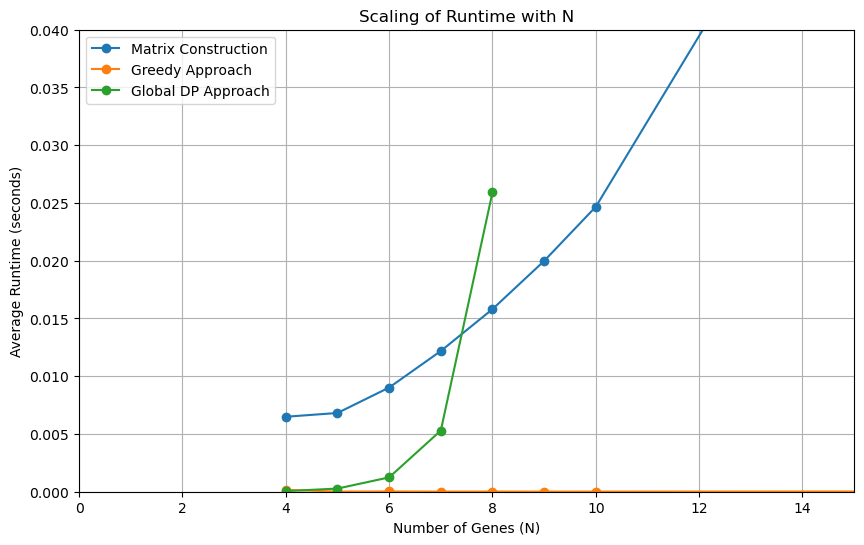

In [37]:
#Plotting zoomed in to check the global approach
plt.figure(figsize=(10,6))
plt.plot(N_values, matrix_times, marker='o', label='Matrix Construction')
plt.plot(N_values, greedy_times, marker='o', label='Greedy Approach')
valid_indices = [i for i, val in enumerate(global_times) if not np.isnan(val)]
plt.plot([N_values[i] for i in valid_indices], [global_times[i] for i in valid_indices], marker='o', label='Global DP Approach')

plt.xlim(0, 15)     #This will show the x-axis from N=3 to N=8
plt.ylim(0, 0.04)    #This will show the y-axis from 0 to 10 seconds of runtime
plt.xlabel('Number of Genes (N)')
plt.ylabel('Average Runtime (seconds)')
plt.title('Scaling of Runtime with N')
plt.legend()
plt.grid(True)
plt.show()

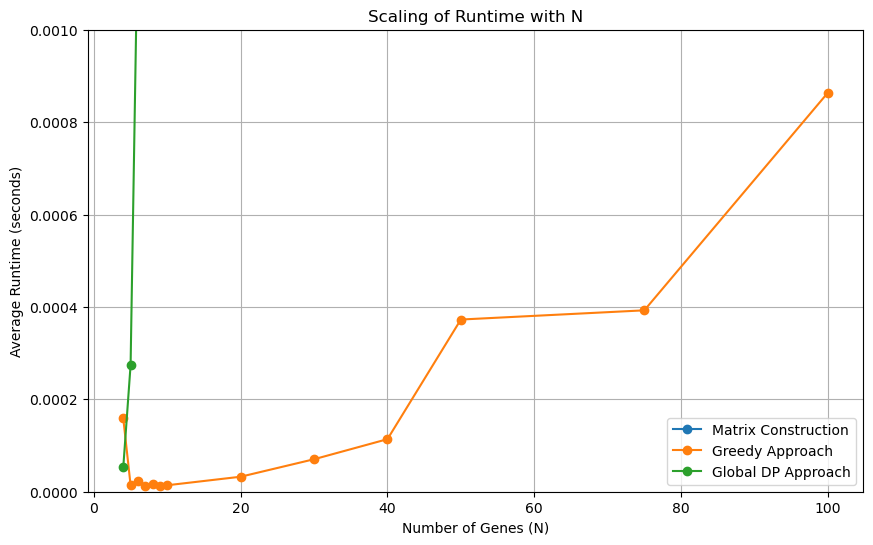

In [38]:
#Plotting zoomed in to check the greedy approach
plt.figure(figsize=(10,6))
plt.plot(N_values, matrix_times, marker='o', label='Matrix Construction')
plt.plot(N_values, greedy_times, marker='o', label='Greedy Approach')
valid_indices = [i for i, val in enumerate(global_times) if not np.isnan(val)]
plt.plot([N_values[i] for i in valid_indices], [global_times[i] for i in valid_indices], marker='o', label='Global DP Approach')

plt.ylim(0, 0.001)    #This will show the y-axis from 0 to 10 seconds of runtime
plt.xlabel('Number of Genes (N)')
plt.ylabel('Average Runtime (seconds)')
plt.title('Scaling of Runtime with N')
plt.legend()
plt.grid(True)
plt.show()

# QUESTION 6

In [41]:
labels = ["a", "b", "c", "d", "e", "f", "g"]
label_to_index = {lab: i for i, lab in enumerate(labels)}  #Maps string labels to their indices

#global tree result: {'b': ['a', 'e'], 'a': ['d', 'f'], 'd': [], 'f': [], 'e': ['c', 'g'], 'c': [], 'g': []}

def needleman_wunsch(seq1, seq2, match_score=0, mismatch_score=1, gap_score=1):
    """
    Performs global sequence alignment using the Needleman-Wunsch algorithm.

    Parameters
    ----------
    seq1 : str
        The first input sequence to align.
    seq2 : str
        The second input sequence to align.
    match_score : int, optional
        The score for a match between characters, by default 0.
    mismatch_score : int, optional
        The penalty for a mismatch between characters, by default 1.
    gap_score : int, optional
        The penalty for introducing a gap in the alignment, by default 1.

    Returns
    -------
    tuple
        A tuple containing two aligned sequences (aligned1, aligned2).
    """
    m, n = len(seq1), len(seq2)
    #Initialize the DP score matrix
    score = [[0] * (n + 1) for _ in range(m + 1)]

    #Fill the first row and column with gap penalties
    for i in range(1, m + 1):
        score[i][0] = score[i - 1][0] + gap_score
    for j in range(1, n + 1):
        score[0][j] = score[0][j - 1] + gap_score

    #Fill the rest of the DP table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            char1 = seq1[i - 1]
            char2 = seq2[j - 1]
            cost_match = score[i - 1][j - 1] + (0 if char1 == char2 else mismatch_score)  #Cost for match/mismatch
            cost_del = score[i - 1][j] + gap_score  #Cost for deletion
            cost_ins = score[i][j - 1] + gap_score  #Cost for insertion
            score[i][j] = min(cost_match, cost_del, cost_ins)  #Take the minimum cost

    #Traceback to reconstruct the alignment
    aligned1 = []
    aligned2 = []
    i, j = m, n
    while i > 0 and j > 0:
        char1 = seq1[i - 1]
        char2 = seq2[j - 1]
        cost_match = score[i - 1][j - 1] + (0 if char1 == char2 else mismatch_score)
        cost_del = score[i - 1][j] + gap_score
        cost_ins = score[i][j - 1] + gap_score

        if score[i][j] == cost_match:  #Match/mismatch
            aligned1.append(char1)
            aligned2.append(char2)
            i -= 1
            j -= 1
        elif score[i][j] == cost_del:  #Deletion
            aligned1.append(char1)
            aligned2.append('-')
            i -= 1
        else:  # Insertion
            aligned1.append('-')
            aligned2.append(char2)
            j -= 1

    #Handle remaining characters in seq1 or seq2
    while i > 0:
        aligned1.append(seq1[i - 1])
        aligned2.append('-')
        i -= 1
    while j > 0:
        aligned1.append('-')
        aligned2.append(seq2[j - 1])
        j -= 1

    #Reverse to get the correct alignment order
    aligned1.reverse()
    aligned2.reverse()
    return "".join(aligned1), "".join(aligned2)

def estimate_mutation_probabilities(tree, strings):
    """
    Estimates insertion, deletion, and substitution probabilities from a genealogical tree.

    Parameters
    ----------
    tree : dict
        A dictionary {parent_label: [child_labels]} representing the genealogical tree.
    strings : list of str
        List of DNA sequences corresponding to the nodes in the tree.

    Returns
    -------
    tuple
        A tuple (p_ins, p_del, p_sub) where:
        - p_ins : float
            Probability of an insertion.
        - p_del : float
            Probability of a deletion.
        - p_sub : float
            Probability of a substitution.
    """
    total_insertions = 0  #Count of insertions across all alignments
    total_deletions = 0  #Count of deletions across all alignments
    total_substitutions = 0  #Count of substitutions across all alignments
    total_positions = 0  #Total positions considered in all alignments

    #Iterate through the tree to align parent-child pairs
    for parent_label, child_labels in tree.items():
        parent_idx = label_to_index[parent_label]
        parent_seq = strings[parent_idx]  #Retrieve the parent sequence
        for c_label in child_labels:
            child_idx = label_to_index[c_label]
            child_seq = strings[child_idx]  #Retrieve the child sequence

            #Perform alignment using Needleman-Wunsch
            aligned_parent, aligned_child = needleman_wunsch(parent_seq, child_seq)

            #Compare aligned sequences to count mutations
            for p_char, c_char in zip(aligned_parent, aligned_child):
                total_positions += 1
                if p_char == c_char:
                    continue  # No mutation
                elif p_char == '-' and c_char != '-':
                    total_insertions += 1  #Count insertion
                elif c_char == '-' and p_char != '-':
                    total_deletions += 1  #Count deletion
                else:
                    total_substitutions += 1  #Count substitution

    #If no positions were aligned, return zero probabilities
    if total_positions == 0:
        return (0, 0, 0)

    #Calculate probabilities
    p_ins = total_insertions / total_positions
    p_del = total_deletions / total_positions
    p_sub = total_substitutions / total_positions
    return p_ins, p_del, p_sub


tree_global_labeled = {'b': ['a', 'e'], 'a': ['d', 'f'], 'd': [], 'f': [], 'e': ['c', 'g'], 'c': [], 'g': []}
p_insert, p_delete, p_mut = estimate_mutation_probabilities(tree_global_labeled, set_strings)

print("Estimated Probabilities:")
print("Insertion:", p_insert)
print("Deletion:", p_delete)
print("Mutation:", p_mut)


Estimated Probabilities:
Insertion: 0.07757065544197234
Deletion: 0.03487672880336741
Mutation: 0.028863499699338546
